# Throughput Comparison

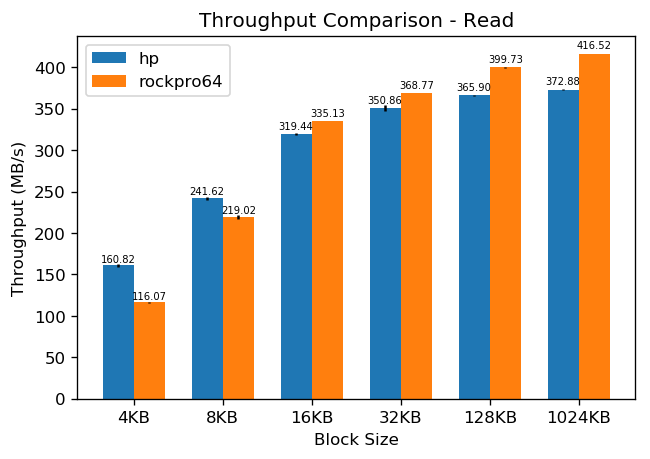

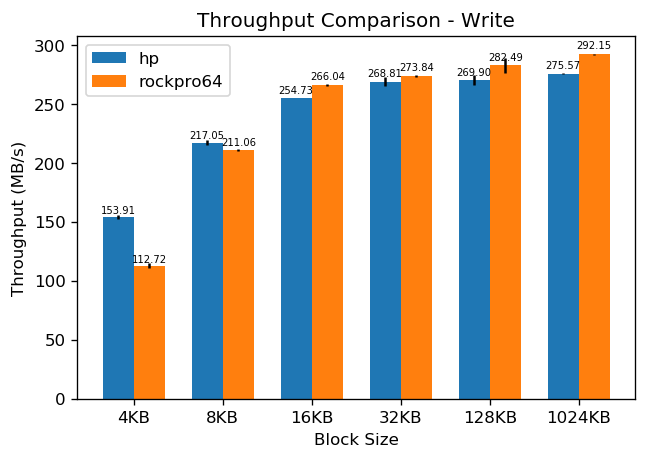

In [2]:
%run 'common/plot_throughput.py'

def plot_throughput_comp(profiles_dirnames):
    ind = np.arange(len(BLOCK_SIZES))
    width = 0.35

    for mode in MODES:
        fig, ax = plt.subplots()
        fig.set_dpi(util.FIG_DPI)

        avg_values = {}
        std_values = {}

        for idx, bs in enumerate(BLOCK_SIZES):
            for plat, dirname in profiles_dirnames.items():
                rounds, values = __get_avg_bws(dirname, bs, mode)
                values_in_window = util.get_values_in_window(values)

                if plat not in avg_values:
                    avg_values[plat] = []

                avg = np.mean(values_in_window)
                avg_values[plat].append(avg)

                if plat not in std_values:
                    std_values[plat] = []
                std_values[plat].append(np.std(values_in_window, ddof=1))

        platforms = profiles_dirnames.keys()
        bars = []
        for idx, plat in enumerate(platforms):
            bars.append(
                ax.bar(ind + width * idx,
                       avg_values[plat],
                       width,
                       yerr=std_values[plat]))

        for idx_bs in ind:
            for idx_plt, plat in enumerate(platforms):
                ax.text(idx_bs + width * idx_plt,
                        avg_values[plat][idx_bs] * 1.01,
                        '{:.2f}'.format(avg_values[plat][idx_bs]),
                        fontsize=6,
                        ha='center',
                        va='bottom')

        ax.set_ylabel('Throughput (MB/s)')
        ax.set_xlabel('Block Size')

        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(BLOCK_SIZES)

        ax.legend(bars, platforms)

        plt.title('Throughput Comparison - ' + mode.capitalize())
        plt.show()


plot_throughput_comp({'hp': 'hp/throughput/2', 'rockpro64': 'rockpro64/throughput/1'})

---
## Verification Comparison

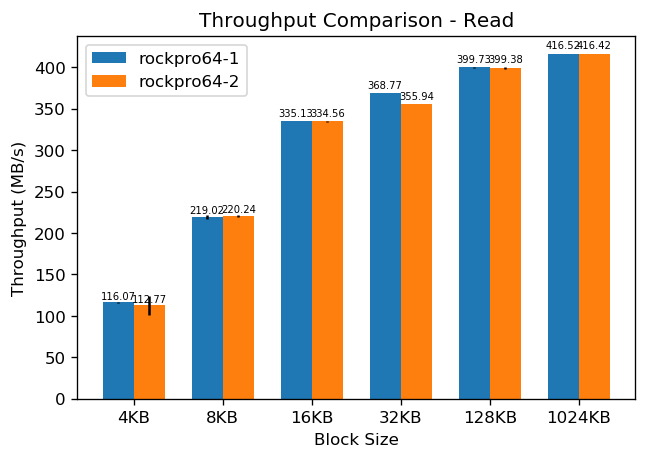

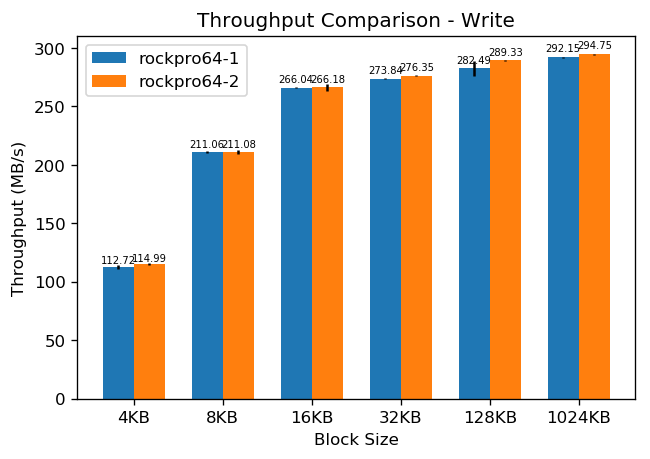

In [3]:
plot_throughput_comp({'rockpro64-1': 'rockpro64/throughput/1', 'rockpro64-2': 'rockpro64/throughput/2'})